<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Check-what-hardware-Keras-is-using" data-toc-modified-id="Check-what-hardware-Keras-is-using-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check what hardware Keras is using</a></span></li><li><span><a href="#Load-Ticker-Data" data-toc-modified-id="Load-Ticker-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load Ticker Data</a></span></li><li><span><a href="#Shape-ticker-data-for-features" data-toc-modified-id="Shape-ticker-data-for-features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Shape ticker data for features</a></span><ul class="toc-item"><li><span><a href="#Align-Ticker-Data" data-toc-modified-id="Align-Ticker-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Align Ticker Data</a></span></li><li><span><a href="#Modify-Time-Spans" data-toc-modified-id="Modify-Time-Spans-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Modify Time Spans</a></span></li><li><span><a href="#Adding-Sentiment-information" data-toc-modified-id="Adding-Sentiment-information-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Adding Sentiment information</a></span></li><li><span><a href="#Construct-%-price-change-label" data-toc-modified-id="Construct-%-price-change-label-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Construct % price change label</a></span></li><li><span><a href="#*-Construct-Binary-label-to-capture-up-or-down-movement-between-days" data-toc-modified-id="*-Construct-Binary-label-to-capture-up-or-down-movement-between-days-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>* Construct Binary label to capture up or down movement between days</a></span></li></ul></li><li><span><a href="#specify-the-output" data-toc-modified-id="specify-the-output-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>specify the output</a></span></li><li><span><a href="#Combine-the-ticker-and-sentiment-data-together" data-toc-modified-id="Combine-the-ticker-and-sentiment-data-together-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Combine the ticker and sentiment data together</a></span></li><li><span><a href="#Construction-of-Features-&amp;-Labels" data-toc-modified-id="Construction-of-Features-&amp;-Labels-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Construction of Features &amp; Labels</a></span><ul class="toc-item"><li><span><a href="#Define-Features" data-toc-modified-id="Define-Features-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Define Features</a></span></li></ul></li><li><span><a href="#Benchmark-Model---Linear-Regression" data-toc-modified-id="Benchmark-Model---Linear-Regression-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Benchmark Model - Linear Regression</a></span></li><li><span><a href="#Build-CNN" data-toc-modified-id="Build-CNN-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Build CNN</a></span><ul class="toc-item"><li><span><a href="#Predict-Price" data-toc-modified-id="Predict-Price-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Predict Price</a></span><ul class="toc-item"><li><span><a href="#Train" data-toc-modified-id="Train-9.1.1"><span class="toc-item-num">9.1.1&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-9.1.2"><span class="toc-item-num">9.1.2&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#Predict-Percentage-Change" data-toc-modified-id="Predict-Percentage-Change-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Predict Percentage Change</a></span><ul class="toc-item"><li><span><a href="#Train" data-toc-modified-id="Train-9.2.1"><span class="toc-item-num">9.2.1&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-9.2.2"><span class="toc-item-num">9.2.2&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#Predict-Up/Down-Movement" data-toc-modified-id="Predict-Up/Down-Movement-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Predict Up/Down Movement</a></span><ul class="toc-item"><li><span><a href="#Train" data-toc-modified-id="Train-9.3.1"><span class="toc-item-num">9.3.1&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-9.3.2"><span class="toc-item-num">9.3.2&nbsp;&nbsp;</span>Results</a></span></li></ul></li></ul></li><li><span><a href="#Messing-Around" data-toc-modified-id="Messing-Around-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Messing Around</a></span></li><li><span><a href="#Other" data-toc-modified-id="Other-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Other</a></span></li></ul></div>

# Setup

This notebook will need the following libraries:

* `keras`
* `pandas`
* `numpy`
* `arrow`

It is recommended to install them through conda. 

# Check what hardware Keras is using

In [230]:
import keras

In [231]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8870710888993298223
]


# Load Ticker Data

In [232]:
import pandas as pd

In [233]:
eth_ticker_raw = pd.read_csv("data/ticker_data/USDT_ETH.csv",index_col=0).rename(columns={"Timestamp":"timestamp"})
btc_ticker_raw = pd.read_csv("data/ticker_data/USDT_BTC.csv",index_col=0).rename(columns={"Timestamp":"timestamp"})          

In [234]:
eth_ticker_raw[eth_ticker_raw.timestamp == 1439014500]

,Close,timestamp,High,Low,Open
0,1.75,1439014500,0.33,1.61,0.33


In [235]:
btc_ticker_raw.head()

,Close,timestamp,High,Low,Open
0,225.0,1424373000,0.33,225.0,0.33
1,225.0,1424373300,225.00,225.0,225.00
2,225.0,1424373600,225.00,225.0,225.00
3,225.0,1424373900,225.00,225.0,225.00
4,225.0,1424374200,225.00,225.0,225.00


In [236]:
# sync the times of the two dataframes

# Shape ticker data for features

* align the btc and eth data
* write function that can create data point windows - 5 minutes, 20 minutes, 6 hours
* create features and outputs

## Align Ticker Data

So that the btc and eth prices align

In [237]:
ticker_data_merged = eth_ticker_raw.set_index("timestamp")\
                .join(
                        btc_ticker_raw.set_index("timestamp"),
                        on="timestamp",
                        how="inner",
                        lsuffix="_eth",
                        rsuffix="_btc")

In [238]:
# checking result
ticker_data_merged.head()

,Close_eth,High_eth,Low_eth,Open_eth,Close_btc,High_btc,Low_btc,Open_btc
timestamp,,,,,,,,
1439014500,1.75,0.33,1.61,0.33,273.947811,275.603572,273.947811,275.603572
1439014800,1.85,1.85,1.85,1.85,273.905543,273.905543,273.626238,273.901814
1439015100,1.85,1.85,1.85,1.85,273.905543,273.905543,273.905543,273.905543
1439015400,1.85,1.85,1.85,1.85,273.917572,273.917572,273.917572,273.917572
1439015700,1.85,1.85,1.85,1.85,273.917572,273.917572,273.917572,273.917572


## Modify Time Spans

The Ticker prices uptill now are in 5 min windows. We want to change that to 10 minutes.

In [239]:
import numpy as np

# in minutes 
minutes = 10
data_point_bucket_size = str(minutes) + "T"

datetime = pd.to_datetime(ticker_data_merged.index,unit='s') 


agg_method = {'Close_eth': "last",
                "High_eth": np.max, 
                "Low_eth": np.min,
                "Open_eth": "first",
                "Close_btc": "last",
                "High_btc": np.max, 
                "Low_btc": np.min,
                "Open_btc": "first", 
                 }

ticker_data = ticker_data_merged.set_index(datetime)\
                                    .resample(data_point_bucket_size)\
                                    .agg(agg_method)

print("Shape of reshaped data: " + str(ticker_data.shape))
print("Shape of original data: " + str(ticker_data_merged.shape))

Shape of reshaped data: (150216, 8)
Shape of original data: (300430, 8)


In [240]:
# checking result
ticker_data.head()

,Close_eth,High_eth,Low_eth,Open_eth,Close_btc,High_btc,Low_btc,Open_btc
timestamp,,,,,,,,
2015-08-08 06:10:00,1.75,0.33,1.61,0.33,273.947811,275.603572,273.947811,275.603572
2015-08-08 06:20:00,1.85,1.85,1.85,1.85,273.905543,273.905543,273.626238,273.901814
2015-08-08 06:30:00,1.85,1.85,1.85,1.85,273.917572,273.917572,273.917572,273.917572
2015-08-08 06:40:00,1.85,1.85,1.85,1.85,273.917572,273.917572,273.917572,273.917572
2015-08-08 06:50:00,1.71,1.71,1.71,1.71,274.155050,274.155050,274.155050,274.155050


## Adding Sentiment information

From the research it looked like sentiments from 4-2 days ago yielded the best results.

In [241]:
import pandas as pd

In [242]:
# checking if data is being read in correctly
sentiment = pd.read_parquet("data/features/sentiment_features")
sentiment.head(5000).dropna()

,avg_reddit_eth_compound_vader,avg_reddit_eth_pos_vader,avg_reddit_eth_neg_vader,avg_reddit_eth_polarity_textblob,avg_reddit_eth_subjectivity_textblob,avg_reddit_btc_compound_vader,avg_reddit_btc_pos_vader,avg_reddit_btc_neg_vader,avg_reddit_btc_polarity_textblob,avg_reddit_btc_subjectivity_textblob,...,avg_4day_twitter_btc_compound_vader,avg_4day_twitter_btc_pos_vader,avg_4day_twitter_btc_neg_vader,avg_4day_twitter_btc_polarity_textblob,avg_4day_twitter_btc_subjectivity_textblob,avg_4day_twitter_compound_vader,avg_4day_twitter_pos_vader,avg_4day_twitter_neg_vader,avg_4day_twitter_polarity_textblob,avg_4day_twitter_subjectivity_textblob
2016-01-05 00:00:00,0.921400,0.802000,0.288000,0.629557,0.533333,0.539011,0.205667,0.085625,0.127882,0.417544,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-05 00:10:00,0.222350,0.566000,0.314500,0.089779,0.641667,0.488052,0.182302,0.081590,0.140953,0.501798,...,0.609873,0.293585,0.153375,0.167216,0.262328,0.609355,0.293298,0.153375,0.182638,0.264452
2016-01-05 00:20:00,-0.476700,0.330000,0.341000,-0.450000,0.750000,0.437094,0.158937,0.077556,0.154024,0.586052,...,0.592523,0.292128,0.155138,0.182643,0.277187,-0.058188,0.288767,0.151118,0.250259,0.547621
2016-01-05 00:30:00,0.659700,0.094000,0.270250,0.104167,0.245833,0.109513,0.126000,0.172467,0.078175,0.506584,...,0.575172,0.290671,0.156902,0.198070,0.292047,-0.027525,0.229029,0.152429,0.285345,0.534792
2016-01-05 00:40:00,0.704967,0.097000,0.199500,0.093287,0.369213,0.155755,0.138048,0.152111,0.100183,0.483497,...,0.557821,0.289215,0.158665,0.213497,0.306906,0.351197,0.196920,0.198200,0.385520,0.537183
2016-01-05 00:50:00,0.750233,0.100000,0.128750,0.082407,0.492593,0.201996,0.150095,0.131756,0.122192,0.460409,...,0.540471,0.287758,0.160429,0.228924,0.321766,0.474006,0.252839,0.154000,0.296414,0.531020
2016-01-05 01:00:00,0.795500,0.103000,0.058000,0.071528,0.615972,0.248237,0.162143,0.111400,0.144201,0.437322,...,0.523120,0.286301,0.162192,0.244350,0.336625,0.405348,0.223650,0.150333,0.256415,0.445263
2016-01-05 01:10:00,0.819950,0.161000,0.016000,0.288907,0.627958,0.246671,0.154571,0.099600,0.082043,0.458287,...,0.505770,0.284844,0.163956,0.259777,0.351484,0.592418,0.272787,0.190800,0.163267,0.279567
2016-01-05 01:20:00,0.825612,0.183500,0.043800,0.288555,0.589719,0.013919,0.129429,0.133800,0.107683,0.475771,...,0.488419,0.283387,0.165719,0.275204,0.366344,0.315339,0.226346,0.313600,0.136164,0.496957
2016-01-05 01:30:00,0.831275,0.206000,0.071600,0.288203,0.551479,-0.218834,0.104286,0.168000,0.133324,0.493255,...,0.471068,0.281930,0.167483,0.290631,0.381203,0.383664,0.246414,0.162000,0.094220,0.507014


In [243]:
# renaming the index
sentiment.index.name = "timestamp"

In [244]:
sentiment.head()

,avg_reddit_eth_compound_vader,avg_reddit_eth_pos_vader,avg_reddit_eth_neg_vader,avg_reddit_eth_polarity_textblob,avg_reddit_eth_subjectivity_textblob,avg_reddit_btc_compound_vader,avg_reddit_btc_pos_vader,avg_reddit_btc_neg_vader,avg_reddit_btc_polarity_textblob,avg_reddit_btc_subjectivity_textblob,...,avg_4day_twitter_btc_compound_vader,avg_4day_twitter_btc_pos_vader,avg_4day_twitter_btc_neg_vader,avg_4day_twitter_btc_polarity_textblob,avg_4day_twitter_btc_subjectivity_textblob,avg_4day_twitter_compound_vader,avg_4day_twitter_pos_vader,avg_4day_twitter_neg_vader,avg_4day_twitter_polarity_textblob,avg_4day_twitter_subjectivity_textblob
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-05 00:00:00,0.921400,0.802,0.28800,0.629557,0.533333,0.539011,0.205667,0.085625,0.127882,0.417544,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-05 00:10:00,0.222350,0.566,0.31450,0.089779,0.641667,0.488052,0.182302,0.081590,0.140953,0.501798,...,0.609873,0.293585,0.153375,0.167216,0.262328,0.609355,0.293298,0.153375,0.182638,0.264452
2016-01-05 00:20:00,-0.476700,0.330,0.34100,-0.450000,0.750000,0.437094,0.158937,0.077556,0.154024,0.586052,...,0.592523,0.292128,0.155138,0.182643,0.277187,-0.058188,0.288767,0.151118,0.250259,0.547621
2016-01-05 00:30:00,0.659700,0.094,0.27025,0.104167,0.245833,0.109513,0.126000,0.172467,0.078175,0.506584,...,0.575172,0.290671,0.156902,0.198070,0.292047,-0.027525,0.229029,0.152429,0.285345,0.534792
2016-01-05 00:40:00,0.704967,0.097,0.19950,0.093287,0.369213,0.155755,0.138048,0.152111,0.100183,0.483497,...,0.557821,0.289215,0.158665,0.213497,0.306906,0.351197,0.196920,0.198200,0.385520,0.537183


## Construct % price change label

In [245]:
eth_close_percent_change = ticker_data.Close_btc.pct_change()
ticker_data["eth_close_percent_change"] = eth_close_percent_change

In [246]:
ticker_data.dtypes

Close_eth                   float64
High_eth                    float64
Low_eth                     float64
Open_eth                    float64
Close_btc                   float64
High_btc                    float64
Low_btc                     float64
Open_btc                    float64
eth_close_percent_change    float64
dtype: object

## * Construct Binary label to capture up or down movement between days

# specify the output
#close_ethb

In [247]:
nothing_changed = ticker_data.eth_close_percent_change.round(decimals=6) == 0
negative_change = ticker_data.eth_close_percent_change.round(decimals=6) < 0
positive_change = ticker_data.eth_close_percent_change.round(decimals=6) > 0



In [248]:
ticker_data["eth_close_movement"] = -9

ticker_data["eth_close_movement"][positive_change] = 1 
ticker_data["eth_close_movement"][nothing_changed] = 0
ticker_data["eth_close_movement"][negative_change] = -1

/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/jeroen/miniconda3/envs/udacity/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

In [249]:
ticker_data = ticker_data[~ticker_data.eth_close_percent_change.isnull()]

**Key**
* -1 went down
* 0 stayed the same
* 1 went up

# Combine the ticker and sentiment data together

In [250]:
ticker_data = ticker_data.join(sentiment,how="inner")

# Construction of Features & Labels

The features I care about:
* eth closing
* btc closing
* eth closing 3 days ago
* eth closing 4 days ago
* btc closing 3 days ago
* btc closing 4 days ago
* sentiment for 3 days ago
* sentiment for 4 days ago

The ratio of features to labels will be 16. And 6 days worth of data needs to be read at a time. This is in line with the research on sentiment analysis. 

For example:
* If the 5 minute intervals are used then the number of features need to be +- 1728 (8640 minutes) and the vector size of the label will be 108 (540 minutes or 9 hours)

**Temporal Golden Rule 1:**
* Temporal order must be preserved. Your features can not be further in time then your labels. 

**NOTE** the above should be doubled as the btc and eth values will be in the input layer

In [251]:
data_point_window = 5
days = 6
feature_vector_size = 6*24*60/data_point_window
output_vector_size = feature_vector_size/16

output_vector_minutes_span = output_vector_size*5
output_vector_hour_span = output_vector_minutes_span/60

print("Number of days feature vector will cover: " + str(days))
print("Data Point Window Size: " + str(data_point_window) + " minutes")
print("Size of feature vector: " + str(feature_vector_size))
print()
print("Number of minutes output vector will cover: " + str(output_vector_minutes_span))
print("Number of hours output vector will cover: " + str(output_vector_hour_span))
print("Size of output vector: " + str(output_vector_size))


Number of days feature vector will cover: 6
Data Point Window Size: 5 minutes
Size of feature vector: 1728.0

Number of minutes output vector will cover: 540.0
Number of hours output vector will cover: 9.0
Size of output vector: 108.0


The following class was obtained from [the following blog](https://nicholastsmith.wordpress.com/2017/11/13/cryptocurrency-price-prediction-using-deep-learning-in-tensorflow/)

In [252]:
##QUESTION!!!!???? bias introduced in the label if there is overlap with the next training row?

import numpy as np
import pandas as pd
 
class PastSampler:
    '''
    Forms training samples for predicting future values from past value
    '''
     
    def __init__(self, N, K, sliding_window = True):
        '''
        Predict K future sample using N previous samples
        '''
        self.K = K
        self.N = N
        self.sliding_window = sliding_window
 
    def transform(self, A):
        M = self.N + self.K     #Number of samples per row (sample + target)
        #indexes
        if self.sliding_window:
            slide_windows_size = 6
            I = np.arange(M) + np.arange(A.shape[0] - M,step=slide_windows_size).reshape(-1, 1)
        else:
            if A.shape[0]%M == 0:
                I = np.arange(M)+np.arange(0,A.shape[0],M).reshape(-1,1)
                
            else:
                I = np.arange(M)+np.arange(0,A.shape[0] -M,M).reshape(-1,1)
            
        B = A[I].reshape(-1, M * A.shape[1], A.shape[2])
        ci = self.N * A.shape[1]    #Number of features per sample
        return B[:, :ci], B[:, ci:] #Sample matrix, Target matrix



## Define Features

In [253]:
# show all the features to choose from
list(ticker_data.columns)

['Close_eth',
 'High_eth',
 'Low_eth',
 'Open_eth',
 'Close_btc',
 'High_btc',
 'Low_btc',
 'Open_btc',
 'eth_close_percent_change',
 'eth_close_movement',
 'avg_reddit_eth_compound_vader',
 'avg_reddit_eth_pos_vader',
 'avg_reddit_eth_neg_vader',
 'avg_reddit_eth_polarity_textblob',
 'avg_reddit_eth_subjectivity_textblob',
 'avg_reddit_btc_compound_vader',
 'avg_reddit_btc_pos_vader',
 'avg_reddit_btc_neg_vader',
 'avg_reddit_btc_polarity_textblob',
 'avg_reddit_btc_subjectivity_textblob',
 'avg_reddit_compound_vader',
 'avg_reddit_pos_vader',
 'avg_reddit_neg_vader',
 'avg_reddit_polarity_textblob',
 'avg_reddit_subjectivity_textblob',
 'avg_twitter_eth_compound_vader',
 'avg_twitter_eth_pos_vader',
 'avg_twitter_eth_neg_vader',
 'avg_twitter_eth_polarity_textblob',
 'avg_twitter_eth_subjectivity_textblob',
 'avg_twitter_btc_compound_vader',
 'avg_twitter_btc_pos_vader',
 'avg_twitter_btc_neg_vader',
 'avg_twitter_btc_polarity_textblob',
 'avg_twitter_btc_subjectivity_textblob',
 'av

In [254]:
#"Close_eth","Close_btc",
#                 "avg_reddit_eth_subjectivity_textblob",
#                  "avg_reddit_eth_pos_vader",
#                 'avg_2day_reddit_eth_compound_vader',
#                 "avg_2day_reddit_eth_pos_vader"]

In [255]:
from sklearn.preprocessing import MinMaxScaler

#
df = ticker_data[["Close_eth",
                  "Close_btc",
                  'eth_close_percent_change',
                    'eth_close_movement',
                  "avg_reddit_eth_subjectivity_textblob",
                  "avg_reddit_eth_pos_vader",
                 'avg_2day_reddit_eth_compound_vader',
                 "avg_2day_reddit_eth_pos_vader"]].copy()

time_stamps_index = df.index

## normalise the prices

scaler = MinMaxScaler()
#original_df = ticker_data.copy()
original_df = df.copy()


columns = ["Close_eth","Close_btc"]
for c in columns:
    df[c] = scaler.fit_transform(df[c].values.reshape(-1,1))

 


In [256]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
## normalization
#
#df = ticker_data[["Close_eth",
#                  "Close_btc",
#                  "avg_twitter_eth_subjectivity_textblob",
#                  "avg_twitter_eth_pos_vader",
#                  "avg_twitter_eth_subjectivity_textblob",
#                 'avg_4day_twitter_eth_compound_vader',
#                  "avg_4day_twitter_eth_subjectivity_textblob",
#                 'avg_4day_twitter_eth_compound_vader',
#                 ]].copy()
#
#time_stamps_index = df.index
#
#original_df = ticker_data.copy()
#
#columns = ["Close_eth","Close_btc"]
#
#for c in columns:
#    df[c] = scaler.fit_transform(df[c].values.reshape(-1,1))
#
# 
#

In [257]:
#Features are input sample dimensions(channels)
A = np.array(df)[:,None,:]
original_A = np.array(original_df)[:,None,:]
time_stamps = np.array(time_stamps_index)[:,None,None]

##Make samples of temporal sequences of pricing data (channel)
#Number of past samples
NPS = 288 # 2 days

#Number of future samples
NFS = 6 #1 hours of movment         

ps = PastSampler(NPS, NFS, sliding_window=False)

X, Y = ps.transform(A)
original_X, original_Y = ps.transform(original_A)

input_times, output_times = ps.transform(time_stamps)

In [258]:
print("Tensor Dimension Explanation")
print("x=number of 'time windows' to train on")
print("y=number of 'time slices' in each 'time window'")
print("z=number of 'features' in each time slice")
X.shape

Tensor Dimension Explanation
x=number of 'time windows' to train on
y=number of 'time slices' in each 'time window'
z=number of 'features' in each time slice


(429, 288, 8)

In [259]:
# declaring the target variable for eth_price 
Y_eth = Y[:,:,0]

# declaring the target variable for eth_perc change
Y_eth_per = Y[:,:,2]
eth_per_indices = (0,1,3,4,5,6,7)

# decalring the target variable for up/down movment 
Y_eth_ud = Y[:,:,3]
eth_ud_indices = (0,1,2,4,5,6,7)

In [260]:
Y_eth_ud

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.],
       ...,
       [-1.,  1., -1., -1.,  1., -1.],
       [ 1., -1., -1.,  1.,  1., -1.],
       [ 1.,  1.,  1.,  1., -1.,  1.]])

In [44]:
### For market movement
#
##Features are input sample dimensions(channels)
#A = np.array(df)[:,None,:]
#original_A = np.array(original_df)[:,None,:]
#time_stamps = np.array(time_stamps_index)[:,None,None]
#
##Make samples of temporal sequences of pricing data (channel)
##Number of past samples
#NPS = 576 #(4 days)#144 #(24 hours)#10
#
##Number of future samples
#NFS = 36 #(6 hours)#2
#
#ps = PastSampler(NPS, NFS, sliding_window=False)
#
#X, Y = ps.transform(A)
#original_X, original_Y = ps.transform(original_A)
#
#input_times, output_times = ps.transform(time_stamps)

In [45]:
print("Shape of original_A" + str(original_A.shape))
print("Shape of time_stamps" + str(time_stamps.shape))
print("Shape of original_X" + str(original_X.shape))
print("Shape of original_Y" + str(original_Y.shape))
print("Shape of X" + str(X.shape))
print("Shape of Y" + str(Y.shape))

Shape of original_A(126277, 1, 8)
Shape of time_stamps(126277, 1, 1)
Shape of original_X(429, 288, 8)
Shape of original_Y(429, 6, 8)
Shape of X(429, 288, 8)
Shape of Y(429, 6, 8)


# Benchmark Model - Linear Regression

# Build CNN

Several different architectures were looked at and compared to one another

In [195]:
#build model
from keras import Sequential
from keras.layers import Conv1D, Conv2D, Dropout, Dense, Flatten, Reshape, LeakyReLU, Softmax

In [221]:
from keras.callbacks import ModelCheckpoint  

def create_checkpoint(model_number,use):
    d = 'model_weights/cnn{}.{}.weights.hdf5'.format(str(model_number),use)
    print("directory:",d)
    checkpointer = ModelCheckpoint(filepath=d, 
                               verbose=0, save_best_only=True)

    return checkpointer




In [220]:
"string{}.{}".format("1","2")

'string1.2'

In [283]:
def train_model(model,checkpoint,train_feat,train_l,test_feat,test_l):
    trained_model = model.fit(train_feat, 
                            train_l,
                            verbose=0, 
                            batch_size=batch_size,
                            validation_data=(test_feat,
                                           test_l), 
                            epochs = epochs,
                            callbacks=[checkpoint]
                         )

    return trained_model

In [369]:
def compile_model0(binary=False):
    model0 = Sequential()

    model0.add(Conv1D(activation='relu', 
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=8, 
                     kernel_size=8))

    model0.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=16, 
                     kernel_size=2))


    model0.add(Flatten())
    
    
    if binary==True:
        model0.add(Dense(1))
        model0.add(Softmax())
        model0.compile(loss='binary_crossentropy', optimizer='SGD')
    else:
        model0.add(Dense(6))
        model0.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model0

In [370]:
def compile_model1(binary=False): 
    model1 = Sequential()

    model1.add(Conv1D(activation='relu', 
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=8, 
                     kernel_size=8))

    model1.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=16, 
                     kernel_size=2))

    model1.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=32, 
                     kernel_size=2))


    model1.add(Flatten())
    

    if binary==True:
        model1.add(Dense(1))
        model1.add(Softmax())
        model1.compile(loss='binary_crossentropy', optimizer='SGD')
    else:
        model1.add(Dense(6))
        model1.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model1

In [371]:
def compile_model2(binary=False): 
    model2 = Sequential()

    model2.add(Conv1D(activation='relu', 
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=8, 
                     kernel_size=8))

    model2.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=16, 
                     kernel_size=2))

    model2.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=32, 
                     kernel_size=2))

    model2.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=64, 
                     kernel_size=2))
    #model.add(Dropout(0.1))

    model2.add(Flatten())
    
    
    if binary==True:
        model2.add(Dense(1))
        model2.add(Softmax())
        model2.compile(loss='binary_crossentropy', optimizer='SGD')
    else:    
        model2.add(Dense(6))
        model2.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model2

In [372]:
def compile_model3(binary=False):
    model3 = Sequential()

    model3.add(Conv1D(activation='relu', 
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=8, 
                     kernel_size=8))

    model3.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=16, 
                     kernel_size=2))

    model3.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=32, 
                     kernel_size=2))

    model3.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=64, 
                     kernel_size=2))

    model3.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=128, 
                     kernel_size=2))


    model3.add(Flatten())
    
    if binary==True:
        model3.add(Dense(1))
        model3.add(Softmax())
        model3.compile(loss='binary_crossentropy', optimizer='SGD')
    else:
        model3.add(Dense(6))
        model3.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model3

In [373]:
def compile_model4(binary=False):
    model4 = Sequential()

    model4.add(Conv1D(activation='relu', 
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=8, 
                     kernel_size=8))

    model4.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=16, 
                     kernel_size=2))

    model4.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=32, 
                     kernel_size=2))

    model4.add(Dropout(0.25))

    model4.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=64, 
                     kernel_size=2))

    model4.add(Dropout(0.25))

    model4.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=128, 
                     kernel_size=2))


    model4.add(Flatten())
    
    
    if binary==True:
        model4.add(Dense(1))
        model4.add(Softmax())
        model4.compile(loss='binary_crossentropy', optimizer='SGD')
    else:    
        model4.add(Dense(6))
        model4.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model4

In [374]:
def compile_model5(binary=False):
    model5 = Sequential()

    model5.add(Conv1D(activation='relu', 
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=8, 
                     kernel_size=8))

    model4.add(Dropout(0.01))


    model5.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=16, 
                     kernel_size=2))


    model5.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=32, 
                     kernel_size=2))


    model5.add(Flatten())
    
    
    if binary==True:
        model5.add(Dense(1))
        model5.add(Softmax())
        model5.compile(loss='binary_crossentropy', optimizer='SGD')
    else:
        model5.add(Dense(6))
        model5.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model5

In [375]:
def compile_model6(binary=False):
    model6 = Sequential()

    model6.add(Conv1D(activation='relu', 
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=8, 
                     kernel_size=8))

    model6.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=16, 
                     kernel_size=2))


    model6.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=32, 
                     kernel_size=2))

    model6.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=32, 
                     kernel_size=2))


    model6.add(Flatten())
    model6.add(Dense(6))
    
    if binary==True:
        model6.add(Dense(1))
        model6.add(Softmax())
        model6.compile(loss='binary_crossentropy', optimizer='SGD')
    else:    
        model6.add(Dense(1))
        model6.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model6

In [376]:
def compile_model7(binary=False):
    model7 = Sequential()

    model7.add(Conv1D(activation='relu', 
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=6, 
                     kernel_size=2))

    model7.add(Conv1D(activation='relu', 
                     strides=2, 
                     filters=6, 
                     kernel_size=2))

    model7.add(Flatten())
    model7.add(Dense(48))
    model4.add(Dropout(0.01))
    model7.add(Dense(24))
    model4.add(Dropout(0.01))
    model7.add(Dense(12))
    
    
    if binary==True:
        model7.add(Dense(1))
        model7.add(Softmax())
        model7.compile(loss='binary_crossentropy', optimizer='SGD')
    else:    
        model7.add(Dense(6))
        model7.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model7

In [377]:
def compile_model8(binary=False):

    from keras.layers import LeakyReLU

    model8 = Sequential()

    model8.add(Conv1D(
                     input_shape=(step_size, 
                                nb_features), 
                     strides=2, 
                     filters=8, 
                     kernel_size=8))

    model8.add(LeakyReLU(alpha=0.1))



    model8.add(Conv1D(
                     strides=2, 
                     filters=16, 
                     kernel_size=2))
    model8.add(LeakyReLU(alpha=0.1))

    model8.add(Conv1D(
                     strides=2, 
                     filters=32, 
                     kernel_size=2))
    model8.add(LeakyReLU(alpha=0.1))
    model8.add(Conv1D( 
                     strides=2, 
                     filters=64, 
                     kernel_size=2))
    #model.add(Dropout(0.1))
    model8.add(LeakyReLU(alpha=0.1))


    model8.add(Flatten())
    
    
    if binary==True:
        model8.add(Dense(1))
        model8.add(Softmax())
        model8.compile(loss='binary_crossentropy', optimizer='SGD')
    else:    
        model8.add(Dense(6))
        model8.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model8

In [378]:
def compile_model9(binary=False):
    model9 = Sequential()

    model9.add(Conv1D( 
                     input_shape=(step_size, 
                                nb_features), 
                     filters=1, 
                     kernel_size=1))

    model9.add(Flatten())
    model9.add(Dense(6))
    
    if binary==True:
        model9.add(Dense(1))
        model9.add(Softmax())
        model9.compile(loss='binary_crossentropy', optimizer='SGD')
    else:
        model9.add(Dense(1))
        model9.compile(loss='mse', optimizer='adam',metrics=['mape','acc'])
    
    return model9

## Predict Price

In [125]:
# set sizes

# training percentage
training_p = 0.6

X_temp = X[:,:,:]

training_size = int(training_p* X_temp.shape[0])
remaining_size = X_temp.shape[0] - training_size
test_size = int(remaining_size/2) + training_size
validation_size = int(remaining_size/2) + test_size


#split training validation
training_features = X_temp[:training_size,:]
training_labels = Y_eth[:training_size,:]

# test set
test_features = X_temp[training_size:test_size,:]
test_labels = Y_eth[training_size:test_size,:]

# validation set
validation_features = X_temp[test_size:validation_size,:]
validation_labels = Y_eth[test_size:validation_size,:]


In [ ]:
epochs = 100
deep_epochs = 200
step_size = X_temp.shape[1]
batch_size= 8
nb_features = X_temp.shape[2]

### Train

**Temporal Golden Rule 2:**
* Temporal Training Order: It can not train and predict on future data and then train and predict on past data.

In [189]:
checkpointer0 = create_checkpoint(0,"price")
checkpointer1 = create_checkpoint(1,"price")
checkpointer2 = create_checkpoint(2,"price")
checkpointer3 = create_checkpoint(3,"price")
checkpointer4 = create_checkpoint(4,"price")
checkpointer5 = create_checkpoint(5,"price")
checkpointer6 = create_checkpoint(6,"price")
checkpointer7 = create_checkpoint(7,"price")
checkpointer8 = create_checkpoint(8,"price")
checkpointer9 = create_checkpoint(9,"price")

directory: model_weights/cnn0.weights.hdf5
directory: model_weights/cnn1.weights.hdf5
directory: model_weights/cnn2.weights.hdf5
directory: model_weights/cnn3.weights.hdf5
directory: model_weights/cnn4.weights.hdf5
directory: model_weights/cnn5.weights.hdf5
directory: model_weights/cnn6.weights.hdf5
directory: model_weights/cnn7.weights.hdf5
directory: model_weights/cnn8.weights.hdf5
directory: model_weights/cnn9.weights.hdf5


In [190]:
model0 = compile_model0()
model1 = compile_model1() 
model2 = compile_model2()
model3 = compile_model3()
model4 = compile_model4()
model5 = compile_model5()
model6 = compile_model6()
model7 = compile_model7()
model8 = compile_model8()
model9 = compile_model9()

In [191]:

X_train = training_features
Y_train = training_labels
X_test = test_features
Y_test = test_labels

trained_model0 = train_model(model0,checkpointer0,X_train,Y_train,X_test,Y_test)
print("done M0")
trained_model1 = train_model(model1,checkpointer1,X_train,Y_train,X_test,Y_test)
print("done M1")
trained_model2 = train_model(model2,checkpointer2,X_train,Y_train,X_test,Y_test)
print("done M2")
trained_model3 = train_model(model3,checkpointer3,X_train,Y_train,X_test,Y_test)
print("done M3")
trained_model4 = train_model(model4,checkpointer4,X_train,Y_train,X_test,Y_test)
print("done M4")
trained_model5 = train_model(model5,checkpointer5,X_train,Y_train,X_test,Y_test)
print("done M5")
trained_model6 = train_model(model6,checkpointer6,X_train,Y_train,X_test,Y_test)
print("done M6")
trained_model7 = train_model(model7,checkpointer7,X_train,Y_train,X_test,Y_test)
print("done M7")
trained_model8 = train_model(model8,checkpointer8,X_train,Y_train,X_test,Y_test)
print("done M8")
trained_model9 = train_model(model9,checkpointer9,X_train,Y_train,X_test,Y_test)
print("done M9")

done M0
done M1
done M2
done M3
done M4
done M5
done M6
done M7
done M8
done M9


### Results

In [192]:
model0.load_weights('model_weights/cnn0.price.weights.hdf5')
model1.load_weights('model_weights/cnn1.price.weights.hdf5')
model2.load_weights('model_weights/cnn2.price.weights.hdf5')
model3.load_weights('model_weights/cnn3.price.weights.hdf5')
model4.load_weights('model_weights/cnn4.price.weights.hdf5')
model5.load_weights('model_weights/cnn5.price.weights.hdf5')
model6.load_weights('model_weights/cnn6.price.weights.hdf5')
model7.load_weights('model_weights/cnn7.price.weights.hdf5')
model8.load_weights('model_weights/cnn8.price.weights.hdf5')
model9.load_weights('model_weights/cnn9.price.weights.hdf5')

In [193]:
import pandas as pd
df = pd.DataFrame(columns=["model","number of convolution layers","filters at each layer","activation function",
                           "number of dense layers","number of paramaters","drop out","mse test score",
                           "mse cv score"])


t0 = trained_model0.model.evaluate(test_features, test_labels, verbose=0)
t1 = trained_model1.model.evaluate(test_features, test_labels, verbose=0)
t2 = trained_model2.model.evaluate(test_features, test_labels, verbose=0)
t3 = trained_model3.model.evaluate(test_features, test_labels, verbose=0)
t4 = trained_model4.model.evaluate(test_features, test_labels, verbose=0)
t5 = trained_model5.model.evaluate(test_features, test_labels, verbose=0)
t6 = trained_model6.model.evaluate(test_features, test_labels, verbose=0)
t7 = trained_model7.model.evaluate(test_features, test_labels, verbose=0)
t8 = trained_model8.model.evaluate(test_features, test_labels, verbose=0)
t9 = trained_model9.model.evaluate(test_features, test_labels, verbose=0)


cv0 = trained_model0.model.evaluate(validation_features, validation_labels, verbose=0)
cv1 = trained_model1.model.evaluate(validation_features, validation_labels, verbose=0)
cv2 = trained_model2.model.evaluate(validation_features, validation_labels, verbose=0)
cv3 = trained_model3.model.evaluate(validation_features, validation_labels, verbose=0)
cv4 = trained_model4.model.evaluate(validation_features, validation_labels, verbose=0)
cv5 = trained_model5.model.evaluate(validation_features, validation_labels, verbose=0)
cv6 = trained_model6.model.evaluate(validation_features, validation_labels, verbose=0)
cv7 = trained_model7.model.evaluate(validation_features, validation_labels, verbose=0)
cv8 = trained_model8.model.evaluate(validation_features, validation_labels, verbose=0)
cv9 = trained_model9.model.evaluate(validation_features, validation_labels, verbose=0)


cv = [cv0,cv1,cv2,cv3,cv4,cv5,cv6,cv7,cv8,cv9]
ts = [t0,t1,t2,t3,t4,t5,t6,t7,t8,t9]
cv_name = ["cnn0","cnn1","cnn2","cnn3","cnn4","cnn5","cnn6","cnn7","cnn8","cnn9"]
layers = ["2","3","4","5","5","3","4","2","4","1"]
drop_out = ["false","false","false","false","true","true","false","false","false","false"]
filter_sizing = ["8,16","8,16,32","8,16,32,64","8,16,32,64,128","8,16,32,64,128","8,16,32","8,16,32,32","6,6","8,16,32,64","1"]
no_dense = ["1","1","1","1","1","1","1","4","1","1"]
paramaters = ["7,390","8,446","12,414","28,542","28,542","8,446","7,070","22,494","12,414","1,743"]
activation = ["relu","relu","relu","relu","relu","relu","relu","relu","leakyrelu","linear"]


row = zip(cv,ts,cv_name,layers,drop_out,filter_sizing,no_dense,paramaters,activation)


for cv_scores,test_score,model_name,layers,drop_out,filter_sizing,no_dense,paramaters,activation_function in row :
    #metric_scores
    
    df = df.append({
         "model":model_name,
        "number of convolution layers":layers,
        "drop out":drop_out,
        "mse test score":test_score[0],
        "mse cv score":cv_scores[0],
        "filters at each layer":filter_sizing,
        "number of dense layers":no_dense,
        "number of paramaters":paramaters,
        "activation function":activation_function
          }, ignore_index=True)

df

,model,number of convolution layers,filters at each layer,activation function,number of dense layers,number of paramaters,drop out,mse test score,mse cv score
0,cnn0,2,"8,16",relu,1,"7,390",false,0.000031,0.000065
1,cnn1,3,"8,16,32",relu,1,"8,446",false,0.000033,0.000083
2,cnn2,4,"8,16,32,64",relu,1,"12,414",false,0.000027,0.000039
3,cnn3,5,"8,16,32,64,128",relu,1,"28,542",false,0.000025,0.000037
4,cnn4,5,"8,16,32,64,128",relu,1,"28,542",true,0.000022,0.000034
5,cnn5,3,"8,16,32",relu,1,"8,446",true,0.000024,0.000037
6,cnn6,4,"8,16,32,32",relu,1,"7,070",false,0.000023,0.000035
7,cnn7,2,"6,6",relu,4,"22,494",false,0.002026,0.007041
8,cnn8,4,"8,16,32,64",leakyrelu,1,"12,414",false,0.000035,0.000066
9,cnn9,1,1,linear,1,"1,743",false,0.000037,0.000158


Do diffent activation functions. Then finished. 

<IPython.core.display.Javascript object>


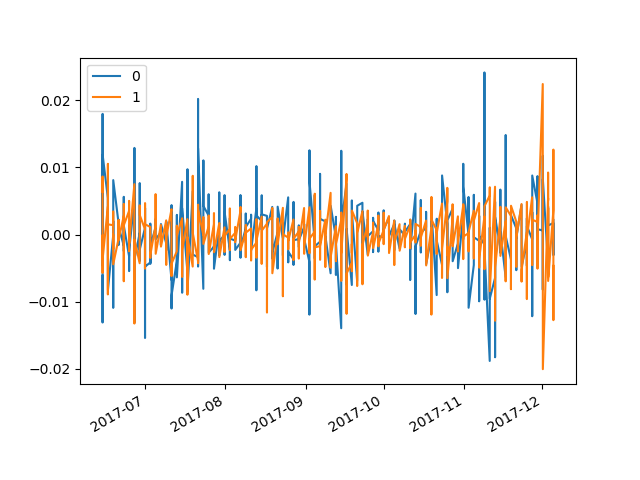

In [194]:
r = trained_model9.model.predict(test_features)

x = test_labels.flatten()
y = r.flatten()
d = np.column_stack((x,y))
%matplotlib notebook
cv_time = output_times[training_size:test_size,:].flatten()
pd.DataFrame(index=cv_time,data=d).plot(kind=("line"))

**note to self: adding 2 day lag helps alot**

<IPython.core.display.Javascript object>


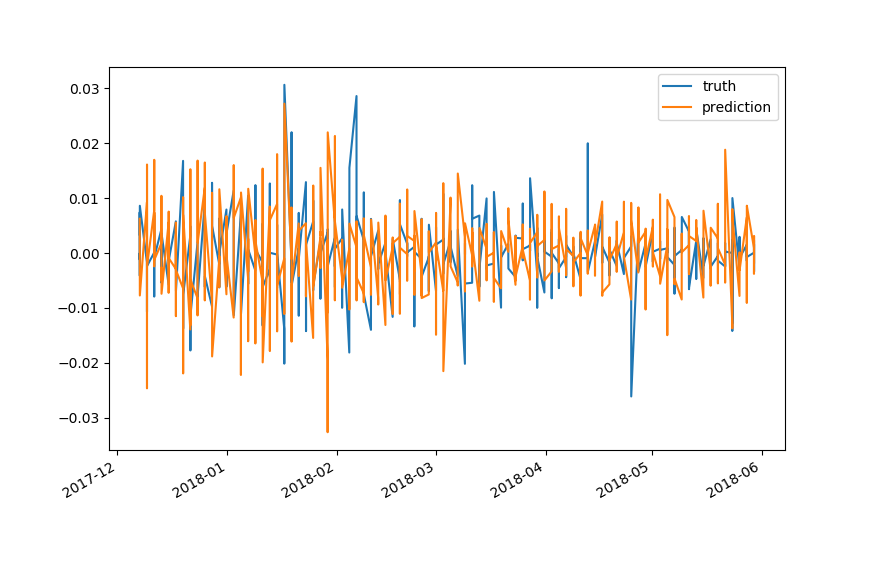

In [158]:
import seaborn as sns

cv_time = output_times[test_size:validation_size,:].flatten()

validation_predictions = trained_model8.model.predict(validation_features)

x = validation_labels.flatten()
y = validation_predictions.flatten()
d = np.column_stack((x,y))

%matplotlib notebook
pd.DataFrame(index=cv_time,data=d,columns=["truth","prediction"]).plot(kind=("line"))

<IPython.core.display.Javascript object>


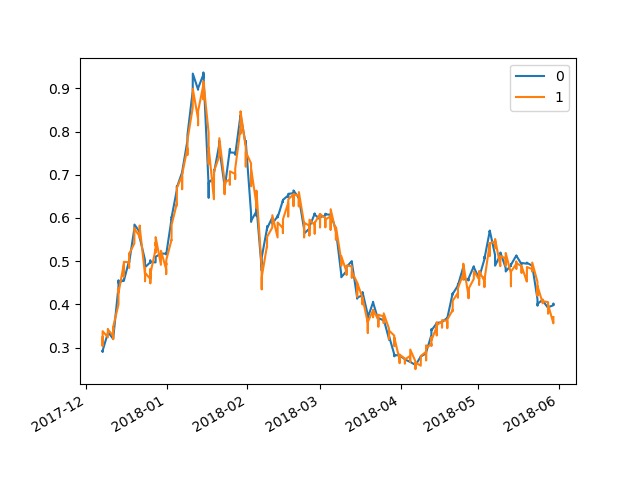

In [91]:
import seaborn as sns

cv_time = output_times[test_size:validation_size,:].flatten()

validation_data = trained_model9.model.predict(validation_features)

x = validation_labels.flatten()
y = validation_data.flatten()
d = np.column_stack((x,y))

%matplotlib notebook
pd.DataFrame(index=cv_time,data=d).plot(kind=("line"))

<IPython.core.display.Javascript object>


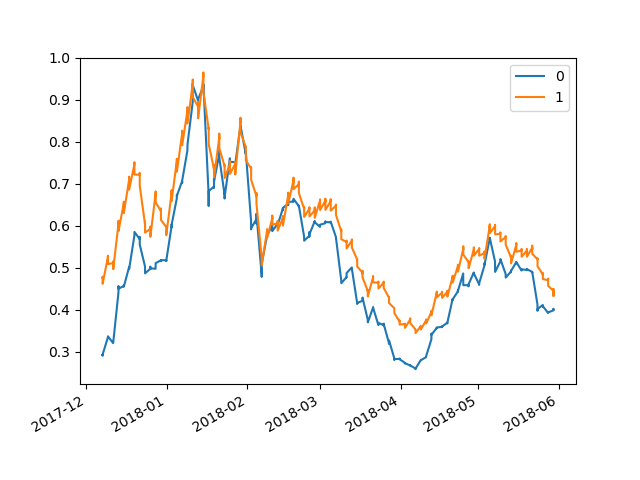

In [96]:
import seaborn as sns

cv_time = output_times[test_size:validation_size,:].flatten()

validation_data = trained_model4.model.predict(validation_features)

x = validation_labels.flatten()
y = validation_data.flatten()
d = np.column_stack((x,y))

%matplotlib notebook
pd.DataFrame(index=cv_time,data=d).plot(kind=("line"))

## Predict Percentage Change

In [125]:
# set sizes

# training percentage
training_p = 0.6

# remove percentage change from the features to avoid model cheating in the form of shifting 
X_temp = X[:,:,eth_per_indices]

training_size = int(training_p* X_temp.shape[0])
remaining_size = X_temp.shape[0] - training_size
test_size = int(remaining_size/2) + training_size
validation_size = int(remaining_size/2) + test_size


#split training validation
training_features = X_temp[:training_size,:]
training_labels = Y_eth_per[:training_size,:]

# test set
test_features = X_temp[training_size:test_size,:]
test_labels = Y_eth_per[training_size:test_size,:]

# validation set
validation_features = X_temp[test_size:validation_size,:]
validation_labels = Y_eth_per[test_size:validation_size,:]


In [ ]:
epochs = 100
deep_epochs = 200
step_size = X_temp.shape[1]
batch_size= 8
nb_features = X_temp.shape[2]

### Train

**Temporal Golden Rule 2:**
* Temporal Training Order: It can not train and predict on future data and then train and predict on past data.

In [222]:
checkpointer0 = create_checkpoint(0,"precentage")
checkpointer1 = create_checkpoint(1,"precentage")
checkpointer2 = create_checkpoint(2,"precentage")
checkpointer3 = create_checkpoint(3,"precentage")
checkpointer4 = create_checkpoint(4,"precentage")
checkpointer5 = create_checkpoint(5,"precentage")
checkpointer6 = create_checkpoint(6,"precentage")
checkpointer7 = create_checkpoint(7,"precentage")
checkpointer8 = create_checkpoint(8,"precentage")
checkpointer9 = create_checkpoint(9,"precentage")

directory: model_weights/cnn0.precentage.weights.hdf5
directory: model_weights/cnn1.precentage.weights.hdf5
directory: model_weights/cnn2.precentage.weights.hdf5
directory: model_weights/cnn3.precentage.weights.hdf5
directory: model_weights/cnn4.precentage.weights.hdf5
directory: model_weights/cnn5.precentage.weights.hdf5
directory: model_weights/cnn6.precentage.weights.hdf5
directory: model_weights/cnn7.precentage.weights.hdf5
directory: model_weights/cnn8.precentage.weights.hdf5
directory: model_weights/cnn9.precentage.weights.hdf5


In [190]:
model0 = compile_model0()
model1 = compile_model1() 
model2 = compile_model2()
model3 = compile_model3()
model4 = compile_model4()
model5 = compile_model5()
model6 = compile_model6()
model7 = compile_model7()
model8 = compile_model8()
model9 = compile_model9()

In [191]:

X_train = training_features
Y_train = training_labels
X_test = test_features
Y_test = test_labels

trained_model0 = train_model(model0,checkpointer0,X_train,Y_train,X_test,Y_test)
print("done M0")
trained_model1 = train_model(model1,checkpointer1,X_train,Y_train,X_test,Y_test)
print("done M1")
trained_model2 = train_model(model2,checkpointer2,X_train,Y_train,X_test,Y_test)
print("done M2")
trained_model3 = train_model(model3,checkpointer3,X_train,Y_train,X_test,Y_test)
print("done M3")
trained_model4 = train_model(model4,checkpointer4,X_train,Y_train,X_test,Y_test)
print("done M4")
trained_model5 = train_model(model5,checkpointer5,X_train,Y_train,X_test,Y_test)
print("done M5")
trained_model6 = train_model(model6,checkpointer6,X_train,Y_train,X_test,Y_test)
print("done M6")
trained_model7 = train_model(model7,checkpointer7,X_train,Y_train,X_test,Y_test)
print("done M7")
trained_model8 = train_model(model8,checkpointer8,X_train,Y_train,X_test,Y_test)
print("done M8")
trained_model9 = train_model(model9,checkpointer9,X_train,Y_train,X_test,Y_test)
print("done M9")

done M0
done M1
done M2
done M3
done M4
done M5
done M6
done M7
done M8
done M9


### Results

In [192]:
model0.load_weights('model_weights/cnn0.precentage.weights.hdf5')
model1.load_weights('model_weights/cnn1.precentage.weights.hdf5')
model2.load_weights('model_weights/cnn2.precentage.weights.hdf5')
model3.load_weights('model_weights/cnn3.precentage.weights.hdf5')
model4.load_weights('model_weights/cnn4.precentage.weights.hdf5')
model5.load_weights('model_weights/cnn5.precentage.weights.hdf5')
model6.load_weights('model_weights/cnn6.precentage.weights.hdf5')
model7.load_weights('model_weights/cnn7.precentage.weights.hdf5')
model8.load_weights('model_weights/cnn8.precentage.weights.hdf5')
model9.load_weights('model_weights/cnn9.precentage.weights.hdf5')

In [193]:
import pandas as pd
df = pd.DataFrame(columns=["model","number of convolution layers","filters at each layer","activation function",
                           "number of dense layers","number of paramaters","drop out","mse test score",
                           "mse cv score"])


t0 = trained_model0.model.evaluate(test_features, test_labels, verbose=0)
t1 = trained_model1.model.evaluate(test_features, test_labels, verbose=0)
t2 = trained_model2.model.evaluate(test_features, test_labels, verbose=0)
t3 = trained_model3.model.evaluate(test_features, test_labels, verbose=0)
t4 = trained_model4.model.evaluate(test_features, test_labels, verbose=0)
t5 = trained_model5.model.evaluate(test_features, test_labels, verbose=0)
t6 = trained_model6.model.evaluate(test_features, test_labels, verbose=0)
t7 = trained_model7.model.evaluate(test_features, test_labels, verbose=0)
t8 = trained_model8.model.evaluate(test_features, test_labels, verbose=0)
t9 = trained_model9.model.evaluate(test_features, test_labels, verbose=0)


cv0 = trained_model0.model.evaluate(validation_features, validation_labels, verbose=0)
cv1 = trained_model1.model.evaluate(validation_features, validation_labels, verbose=0)
cv2 = trained_model2.model.evaluate(validation_features, validation_labels, verbose=0)
cv3 = trained_model3.model.evaluate(validation_features, validation_labels, verbose=0)
cv4 = trained_model4.model.evaluate(validation_features, validation_labels, verbose=0)
cv5 = trained_model5.model.evaluate(validation_features, validation_labels, verbose=0)
cv6 = trained_model6.model.evaluate(validation_features, validation_labels, verbose=0)
cv7 = trained_model7.model.evaluate(validation_features, validation_labels, verbose=0)
cv8 = trained_model8.model.evaluate(validation_features, validation_labels, verbose=0)
cv9 = trained_model9.model.evaluate(validation_features, validation_labels, verbose=0)


cv = [cv0,cv1,cv2,cv3,cv4,cv5,cv6,cv7,cv8,cv9]
ts = [t0,t1,t2,t3,t4,t5,t6,t7,t8,t9]
cv_name = ["cnn0","cnn1","cnn2","cnn3","cnn4","cnn5","cnn6","cnn7","cnn8","cnn9"]
layers = ["2","3","4","5","5","3","4","2","4","1"]
drop_out = ["false","false","false","false","true","true","false","false","false","false"]
filter_sizing = ["8,16","8,16,32","8,16,32,64","8,16,32,64,128","8,16,32,64,128","8,16,32","8,16,32,32","6,6","8,16,32,64","1"]
no_dense = ["1","1","1","1","1","1","1","4","1","1"]
paramaters = ["7,390","8,446","12,414","28,542","28,542","8,446","7,070","22,494","12,414","1,743"]
activation = ["relu","relu","relu","relu","relu","relu","relu","relu","leakyrelu","linear"]


row = zip(cv,ts,cv_name,layers,drop_out,filter_sizing,no_dense,paramaters,activation)


for cv_scores,test_score,model_name,layers,drop_out,filter_sizing,no_dense,paramaters,activation_function in row :
    #metric_scores
    
    df = df.append({
         "model":model_name,
        "number of convolution layers":layers,
        "drop out":drop_out,
        "mse test score":test_score[0],
        "mse cv score":cv_scores[0],
        "filters at each layer":filter_sizing,
        "number of dense layers":no_dense,
        "number of paramaters":paramaters,
        "activation function":activation_function
          }, ignore_index=True)

df

,model,number of convolution layers,filters at each layer,activation function,number of dense layers,number of paramaters,drop out,mse test score,mse cv score
0,cnn0,2,"8,16",relu,1,"7,390",false,0.000031,0.000065
1,cnn1,3,"8,16,32",relu,1,"8,446",false,0.000033,0.000083
2,cnn2,4,"8,16,32,64",relu,1,"12,414",false,0.000027,0.000039
3,cnn3,5,"8,16,32,64,128",relu,1,"28,542",false,0.000025,0.000037
4,cnn4,5,"8,16,32,64,128",relu,1,"28,542",true,0.000022,0.000034
5,cnn5,3,"8,16,32",relu,1,"8,446",true,0.000024,0.000037
6,cnn6,4,"8,16,32,32",relu,1,"7,070",false,0.000023,0.000035
7,cnn7,2,"6,6",relu,4,"22,494",false,0.002026,0.007041
8,cnn8,4,"8,16,32,64",leakyrelu,1,"12,414",false,0.000035,0.000066
9,cnn9,1,1,linear,1,"1,743",false,0.000037,0.000158


Do diffent activation functions. Then finished. 

<IPython.core.display.Javascript object>


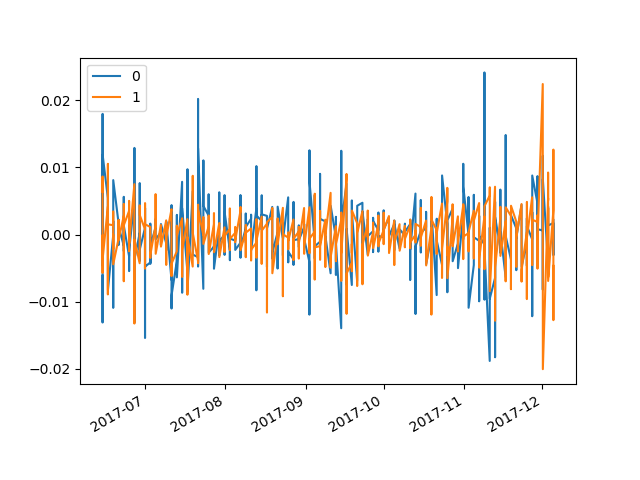

In [194]:
r = trained_model9.model.predict(test_features)

x = test_labels.flatten()
y = r.flatten()
d = np.column_stack((x,y))
%matplotlib notebook
cv_time = output_times[training_size:test_size,:].flatten()
pd.DataFrame(index=cv_time,data=d).plot(kind=("line"))

**note to self: adding 2 day lag helps alot**

<IPython.core.display.Javascript object>


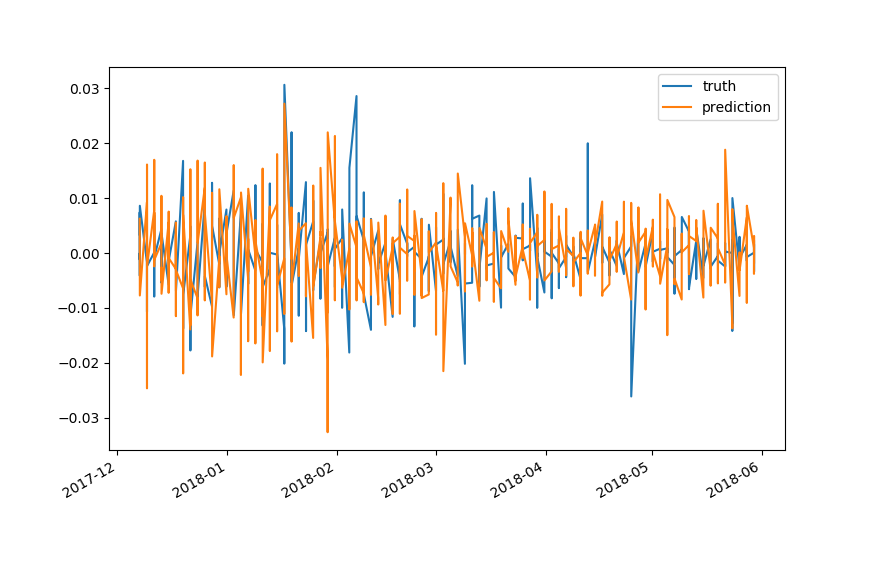

In [158]:
import seaborn as sns

cv_time = output_times[test_size:validation_size,:].flatten()

validation_predictions = trained_model8.model.predict(validation_features)

x = validation_labels.flatten()
y = validation_predictions.flatten()
d = np.column_stack((x,y))

%matplotlib notebook
pd.DataFrame(index=cv_time,data=d,columns=["truth","prediction"]).plot(kind=("line"))

## Predict Up/Down Movement

In [347]:
# True -> 1 hour later it was more 
# False -> 1 hour later it was less
Y_up = Y_eth[:,0]-Y_eth[:,-1] < 0

In [348]:
Y_up = Y_up.astype(int)

In [357]:
Y_up.sum()

213

In [359]:
Y_up.shape

(429,)

In [349]:
# set sizes

# training percentage
training_p = 0.6

# remove percentage change from the features to avoid model cheating in the form of shifting 
X_temp = X[:,:,eth_ud_indices]

training_size = int(training_p* X_temp.shape[0])
remaining_size = X_temp.shape[0] - training_size
test_size = int(remaining_size/2) + training_size
validation_size = int(remaining_size/2) + test_size


#split training validation
training_features = X_temp[:training_size,:]
training_labels = Y_up[:training_size]

# test set
test_features = X_temp[training_size:test_size,:]
test_labels = Y_up[training_size:test_size]

# validation set
validation_features = X_temp[test_size:validation_size,:]
validation_labels = Y_up[test_size:validation_size]


In [350]:
epochs = 100
deep_epochs = 200
step_size = X_temp.shape[1]
batch_size= 8
nb_features = X_temp.shape[2]

### Train

**Temporal Golden Rule 2:**
* Temporal Training Order: It can not train and predict on future data and then train and predict on past data.

In [379]:
checkpointer0 = create_checkpoint(0,"up-down")
checkpointer1 = create_checkpoint(1,"up-down")
checkpointer2 = create_checkpoint(2,"up-down")
checkpointer3 = create_checkpoint(3,"up-down")
checkpointer4 = create_checkpoint(4,"up-down")
checkpointer5 = create_checkpoint(5,"up-down")
checkpointer6 = create_checkpoint(6,"up-down")
checkpointer7 = create_checkpoint(7,"up-down")
checkpointer8 = create_checkpoint(8,"up-down")
checkpointer9 = create_checkpoint(9,"up-down")

directory: model_weights/cnn0.up-down.weights.hdf5
directory: model_weights/cnn1.up-down.weights.hdf5
directory: model_weights/cnn2.up-down.weights.hdf5
directory: model_weights/cnn3.up-down.weights.hdf5
directory: model_weights/cnn4.up-down.weights.hdf5
directory: model_weights/cnn5.up-down.weights.hdf5
directory: model_weights/cnn6.up-down.weights.hdf5
directory: model_weights/cnn7.up-down.weights.hdf5
directory: model_weights/cnn8.up-down.weights.hdf5
directory: model_weights/cnn9.up-down.weights.hdf5


In [380]:
model0 = compile_model0(binary=True)
model1 = compile_model1(binary=True) 
model2 = compile_model2(binary=True)
model3 = compile_model3(binary=True)
model4 = compile_model4(binary=True)
model5 = compile_model5(binary=True)
model6 = compile_model6(binary=True)
model7 = compile_model7(binary=True)
model8 = compile_model8(binary=True)
model9 = compile_model9(binary=True)

In [381]:

X_train = training_features
Y_train = training_labels
X_test = test_features
Y_test = test_labels

trained_model0 = train_model(model0,checkpointer0,X_train,Y_train,X_test,Y_test)
print("done M0")
#trained_model1 = train_model(model1,checkpointer1,X_train,Y_train,X_test,Y_test)
#print("done M1")
#trained_model2 = train_model(model2,checkpointer2,X_train,Y_train,X_test,Y_test)
#print("done M2")
#trained_model3 = train_model(model3,checkpointer3,X_train,Y_train,X_test,Y_test)
#print("done M3")
#trained_model4 = train_model(model4,checkpointer4,X_train,Y_train,X_test,Y_test)
#print("done M4")
#trained_model5 = train_model(model5,checkpointer5,X_train,Y_train,X_test,Y_test)
#print("done M5")
#trained_model6 = train_model(model6,checkpointer6,X_train,Y_train,X_test,Y_test)
#print("done M6")
#trained_model7 = train_model(model7,checkpointer7,X_train,Y_train,X_test,Y_test)
#print("done M7")
#trained_model8 = train_model(model8,checkpointer8,X_train,Y_train,X_test,Y_test)
#print("done M8")
#trained_model9 = train_model(model9,checkpointer9,X_train,Y_train,X_test,Y_test)
#print("done M9")

done M0


### Results

In [320]:
trained_model0.model.load_weights('model_weights/cnn0.up-down.weights.hdf5')
trained_model1.model.load_weights('model_weights/cnn1.up-down.weights.hdf5')
trained_model2.model.load_weights('model_weights/cnn2.up-down.weights.hdf5')
trained_model3.model.load_weights('model_weights/cnn3.up-down.weights.hdf5')
trained_model4.model.load_weights('model_weights/cnn4.up-down.weights.hdf5')
trained_model5.model.load_weights('model_weights/cnn5.up-down.weights.hdf5')
trained_model6.model.load_weights('model_weights/cnn6.up-down.weights.hdf5')
trained_model7.model.load_weights('model_weights/cnn7.up-down.weights.hdf5')
trained_model8.model.load_weights('model_weights/cnn8.up-down.weights.hdf5')
trained_model9.model.load_weights('model_weights/cnn9.up-down.weights.hdf5')

In [382]:
a = trained_model0.model.predict(X_train)

In [383]:
f1_score(Y_train,a)

0.6293333333333333

In [ ]:
0.6293333333333333

In [367]:
Y_train.sum()

118

In [368]:
Y_train.shape

(257,)

In [330]:
import pandas as pd
df = pd.DataFrame(columns=["model","number of convolution layers","filters at each layer","activation function",
                           "number of dense layers","number of paramaters","drop out","mse test score",
                           "mse cv score"])


t0_pred = trained_model0.model.predict(test_features, verbose=0)
t1_pred = trained_model1.model.predict(test_features, verbose=0)
t2_pred = trained_model2.model.predict(test_features, verbose=0)
t3_pred = trained_model3.model.predict(test_features, verbose=0)
t4_pred = trained_model4.model.predict(test_features, verbose=0)
t5_pred = trained_model5.model.predict(test_features, verbose=0)
t6_pred = trained_model6.model.predict(test_features, verbose=0)
t7_pred = trained_model7.model.predict(test_features, verbose=0)
t8_pred = trained_model8.model.predict(test_features, verbose=0)
t9_pred = trained_model9.model.predict(test_features, verbose=0)

cv0_pred = trained_model0.model.predict(validation_features, verbose=0)
cv1_pred = trained_model1.model.predict(validation_features, verbose=0)
cv2_pred = trained_model2.model.predict(validation_features, verbose=0)
cv3_pred = trained_model3.model.predict(validation_features, verbose=0)
cv4_pred = trained_model4.model.predict(validation_features, verbose=0)
cv5_pred = trained_model5.model.predict(validation_features, verbose=0)
cv6_pred = trained_model6.model.predict(validation_features, verbose=0)
cv7_pred = trained_model7.model.predict(validation_features, verbose=0)
cv8_pred = trained_model8.model.predict(validation_features, verbose=0)
cv9_pred = trained_model9.model.predict(validation_features, verbose=0)


from sklearn.metrics import f1_score

t0 = f1_score(validation_labels,t0_pred)
t1 = f1_score(validation_labels,t1_pred)
t2 = f1_score(validation_labels,t2_pred)
t3 = f1_score(validation_labels,t3_pred)
t4 = f1_score(validation_labels,t4_pred)
t5 = f1_score(validation_labels,t5_pred)
t6 = f1_score(validation_labels,t6_pred)
t7 = f1_score(validation_labels,t7_pred)
t8 = f1_score(validation_labels,t8_pred)
t9 = f1_score(validation_labels,t9_pred)


cv0 = f1_score(validation_labels,cv0_pred)
cv1 = f1_score(validation_labels,cv1_pred)
cv2 = f1_score(validation_labels,cv2_pred)
cv3 = f1_score(validation_labels,cv3_pred)
cv4 = f1_score(validation_labels,cv4_pred)
cv5 = f1_score(validation_labels,cv5_pred)
cv6 = f1_score(validation_labels,cv6_pred)
cv7 = f1_score(validation_labels,cv7_pred)
cv8 = f1_score(validation_labels,cv8_pred)
cv9 = f1_score(validation_labels,cv9_pred)



In [331]:

cv = [cv0,cv1,cv2,cv3,cv4,cv5,cv6,cv7,cv8,cv9]
ts = [t0,t1,t2,t3,t4,t5,t6,t7,t8,t9]
cv_name = ["cnn0","cnn1","cnn2","cnn3","cnn4","cnn5","cnn6","cnn7","cnn8","cnn9"]
layers = ["2","3","4","5","5","3","4","2","4","1"]
drop_out = ["false","false","false","false","true","true","false","false","false","false"]
filter_sizing = ["8,16","8,16,32","8,16,32,64","8,16,32,64,128","8,16,32,64,128","8,16,32","8,16,32,32","6,6","8,16,32,64","1"]
no_dense = ["1","1","1","1","1","1","1","4","1","1"]
paramaters = ["7,390","8,446","12,414","28,542","28,542","8,446","7,070","22,494","12,414","1,743"]
activation = ["relu","relu","relu","relu","relu","relu","relu","relu","leakyrelu","linear"]


row = zip(cv,ts,cv_name,layers,drop_out,filter_sizing,no_dense,paramaters,activation)


for cv_scores,test_score,model_name,layers,drop_out,filter_sizing,no_dense,paramaters,activation_function in row :
    #metric_scores
    
    df = df.append({
         "model":model_name,
        "number of convolution layers":layers,
        "drop out":drop_out,
        "mse test score":test_score,
        "mse cv score":cv_scores,
        "filters at each layer":filter_sizing,
        "number of dense layers":no_dense,
        "number of paramaters":paramaters,
        "activation function":activation_function
          }, ignore_index=True)

df

,model,number of convolution layers,filters at each layer,activation function,number of dense layers,number of paramaters,drop out,mse test score,mse cv score
0,cnn0,2,"8,16",relu,1,"7,390",false,0.744526,0.744526
1,cnn1,3,"8,16,32",relu,1,"8,446",false,0.744526,0.744526
2,cnn2,4,"8,16,32,64",relu,1,"12,414",false,0.744526,0.744526
3,cnn3,5,"8,16,32,64,128",relu,1,"28,542",false,0.744526,0.744526
4,cnn4,5,"8,16,32,64,128",relu,1,"28,542",true,0.744526,0.744526
5,cnn5,3,"8,16,32",relu,1,"8,446",true,0.744526,0.744526
6,cnn6,4,"8,16,32,32",relu,1,"7,070",false,0.744526,0.744526
7,cnn7,2,"6,6",relu,4,"22,494",false,0.744526,0.744526
8,cnn8,4,"8,16,32,64",leakyrelu,1,"12,414",false,0.744526,0.744526
9,cnn9,1,1,linear,1,"1,743",false,0.744526,0.744526


In [336]:
validation_labels

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [306]:
cv0

6.4881797280422475

Do diffent activation functions. Then finished. 

<IPython.core.display.Javascript object>


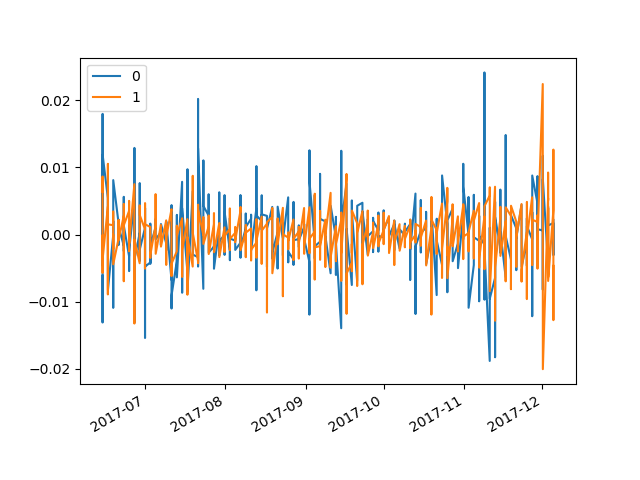

In [194]:
r = trained_model9.model.predict(test_features)

x = test_labels.flatten()
y = r.flatten()
d = np.column_stack((x,y))
%matplotlib notebook
cv_time = output_times[training_size:test_size,:].flatten()
pd.DataFrame(index=cv_time,data=d).plot(kind=("line"))

**note to self: adding 2 day lag helps alot**

<IPython.core.display.Javascript object>


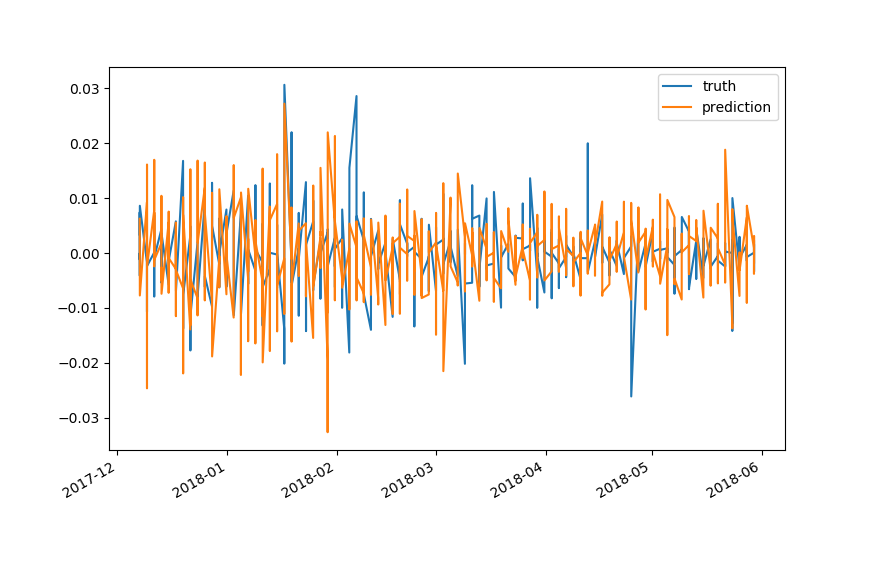

In [158]:
import seaborn as sns

cv_time = output_times[test_size:validation_size,:].flatten()

validation_predictions = trained_model8.model.predict(validation_features)

x = validation_labels.flatten()
y = validation_predictions.flatten()
d = np.column_stack((x,y))

%matplotlib notebook
pd.DataFrame(index=cv_time,data=d,columns=["truth","prediction"]).plot(kind=("line"))

In [93]:
test_labels.shape

(74, 36, 10)

# Messing Around

In [32]:
Y_closing_eth_price = Y[:,0,0]
Y_market_movement = Y[:,0,9]
Y.shape

(245, 36, 10)

In [27]:
Y[:,0,0]

array([0.00098069, 0.00098069, 0.00098069, ..., 0.34931876, 0.34929688,
       0.34917204])

In [28]:
Y[:,35,0]

IndexError: index 35 is out of bounds for axis 1 with size 1

In [ ]:
0.00082603/0.00062919

In [33]:
np.seterr(divide='ignore', invalid='ignore')
np.divide(Y[:,0,0],Y[:,35,0]) 

array([0.76170337, 0.99103138, 0.72173916, 0.92831543, 1.        ,
       1.        , 0.95933611, 1.        , 0.84570564, 1.        ,
       1.        , 1.13685732, 1.05023926, 1.        , 1.        ,
       0.96272123, 1.08987612, 0.99156113, 1.04733728, 0.94960618,
       0.92252675, 0.94071232, 0.95480225, 1.04692387, 1.00000046,
       0.93842781, 1.01155952, 0.99677818, 0.97314251, 0.98384047,
       0.98369361, 0.96399787, 1.00000001, 1.        , 1.01469298,
       0.99125992, 0.95898438, 0.95862624, 1.07647969, 1.01511382,
       1.00474268, 0.98181818, 0.99587629, 0.97036283, 1.03707137,
       1.07389749, 0.9747245 , 0.99832432, 0.88248892, 0.91174036,
       1.01297355, 0.9607204 , 1.00386742, 0.96307526, 0.9888395 ,
       1.00628617, 0.95584706, 1.01216344, 0.97194116, 0.97675893,
       1.01976349, 0.99021012, 0.97725981, 1.00443143, 1.0085701 ,
       0.96059384, 0.96871602, 0.99842379, 1.06438467, 0.95325248,
       1.00640741, 1.        , 0.98798595, 1.13367361, 0.91161

In [31]:
Y.shape

(149960, 1, 10)

In [126]:
np.average(np.divide(Y[0:100000,0,0],Y[0:100000,35,0]) < 1)

0.49387755102040815

In [125]:
np.average(np.divide(Y[0:100000,0,0],Y[0:100000,35,0]) > 1)

0.47346938775510206

In [96]:
r_1 = Y[0:100000,0,0]
r_2 = Y[0:100000,35,0]
r_3 = np.divide(r_1,r_2)

r_c_lt = r_3 < 1
r_c_gt = r_3 > 1


/home/jeroens/miniconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [97]:
np.average(r_3[r_c_lt])

0.9713363119724743

In [101]:
(np.average(r_3[r_c_gt][1:7054]) + np.average(r_3[r_c_gt][7055:]))/2

1.0422773815639128

In [90]:
r_3[r_c][7053:7055]
# point 7055 has an inf for what ever reason.....

array([1.00766735,        inf])

In [54]:
np.average(r_3[r_c])

inf

In [44]:
np.divide(Y[0:100000,0,0],Y[0:100000,35,0])

/home/jeroens/miniconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.76170337, 0.76170337, 0.73662672, ..., 1.00539378, 0.99584584,
       0.99255389])

/home/jeroens/miniconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


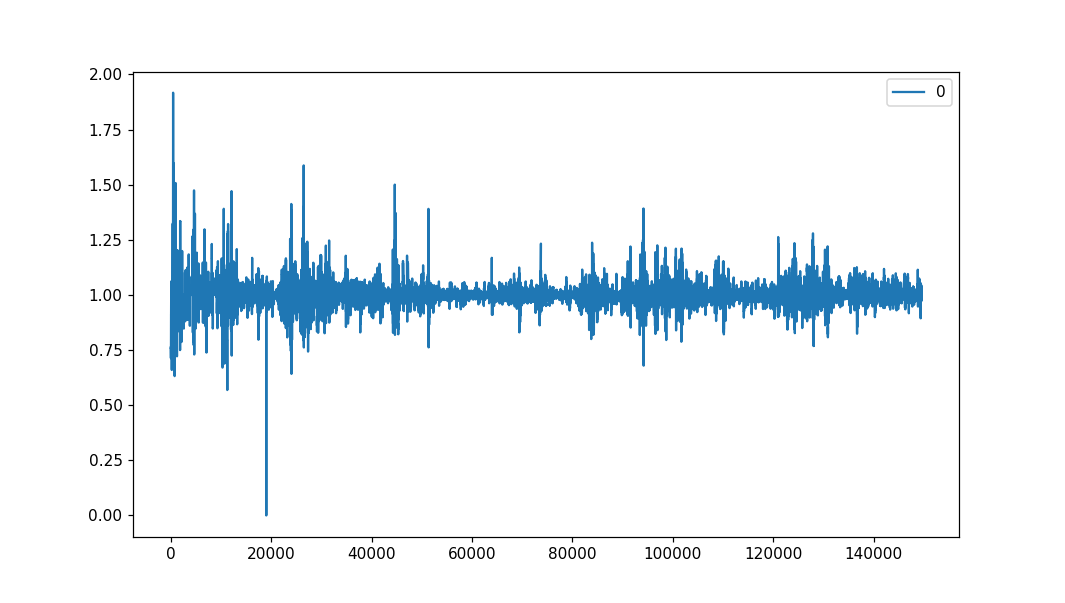

In [23]:
# 6 hours interval eth closing price % change
%matplotlib notebook
pd.DataFrame(np.divide(Y[:,0,0],Y[:,35,0])).plot(kind="line")

In [39]:

xx = Y[:,0,0] 

xxx = xx == 0
xx[xxx]

array([0.])

In [22]:
X.shape

(149605, 576, 8)

In [24]:
# labels for up/down behavior 
Y[:,0,0].shape

(149605,)

# Other

In [138]:
trained_model0 = model0.fit(training_features, 
                            training_labels,
                            verbose=0, 
                            batch_size=batch_size,
                            validation_data=(test_features,
                                           test_labels), 
                            epochs = epochs,
                            callbacks=[checkpointer0]
                         )


trained_model1 = model1.fit(training_features, 
                            training_labels,
                            verbose=0, 
                            batch_size=batch_size,
                            validation_data=(test_features,
                                           test_labels), 
                            epochs = epochs,
                            callbacks=[checkpointer1]
                         )

trained_model2 = model2.fit(training_features, 
                            training_labels,
                            verbose=0, 
                            batch_size=batch_size,
                            validation_data=(test_features,
                                           test_labels), 
                            epochs = epochs,
                            callbacks=[checkpointer2]
                         )

trained_model3 = model3.fit(training_features, 
                            training_labels,
                            verbose=0, 
                            batch_size=batch_size,
                            validation_data=(test_features,
                                           test_labels), 
                            epochs = epochs,
                            callbacks=[checkpointer3]
                         )




Epoch 00001: val_loss improved from inf to 0.00426, saving model to model_weights/cnn0.weights.hdf5

Epoch 00002: val_loss improved from 0.00426 to 0.00178, saving model to model_weights/cnn0.weights.hdf5

Epoch 00003: val_loss improved from 0.00178 to 0.00103, saving model to model_weights/cnn0.weights.hdf5

Epoch 00004: val_loss improved from 0.00103 to 0.00065, saving model to model_weights/cnn0.weights.hdf5

Epoch 00005: val_loss improved from 0.00065 to 0.00044, saving model to model_weights/cnn0.weights.hdf5

Epoch 00006: val_loss improved from 0.00044 to 0.00028, saving model to model_weights/cnn0.weights.hdf5

Epoch 00007: val_loss improved from 0.00028 to 0.00018, saving model to model_weights/cnn0.weights.hdf5

Epoch 00008: val_loss improved from 0.00018 to 0.00011, saving model to model_weights/cnn0.weights.hdf5

Epoch 00009: val_loss improved from 0.00011 to 0.00007, saving model to model_weights/cnn0.weights.hdf5

Epoch 00010: val_loss improved from 0.00007 to 0.00005, sa


Epoch 00016: val_loss improved from 0.00004 to 0.00004, saving model to model_weights/cnn1.weights.hdf5

Epoch 00017: val_loss improved from 0.00004 to 0.00004, saving model to model_weights/cnn1.weights.hdf5

Epoch 00018: val_loss did not improve from 0.00004

Epoch 00019: val_loss did not improve from 0.00004

Epoch 00020: val_loss did not improve from 0.00004

Epoch 00021: val_loss did not improve from 0.00004

Epoch 00022: val_loss did not improve from 0.00004

Epoch 00023: val_loss did not improve from 0.00004

Epoch 00024: val_loss did not improve from 0.00004

Epoch 00025: val_loss did not improve from 0.00004

Epoch 00026: val_loss did not improve from 0.00004

Epoch 00027: val_loss did not improve from 0.00004

Epoch 00028: val_loss did not improve from 0.00004

Epoch 00029: val_loss did not improve from 0.00004

Epoch 00030: val_loss did not improve from 0.00004

Epoch 00031: val_loss did not improve from 0.00004

Epoch 00032: val_loss did not improve from 0.00004

Epoch 000


Epoch 00064: val_loss did not improve from 0.00002

Epoch 00065: val_loss did not improve from 0.00002

Epoch 00066: val_loss did not improve from 0.00002

Epoch 00067: val_loss did not improve from 0.00002

Epoch 00068: val_loss did not improve from 0.00002

Epoch 00069: val_loss did not improve from 0.00002

Epoch 00070: val_loss did not improve from 0.00002

Epoch 00071: val_loss did not improve from 0.00002

Epoch 00072: val_loss did not improve from 0.00002

Epoch 00073: val_loss did not improve from 0.00002

Epoch 00074: val_loss did not improve from 0.00002

Epoch 00075: val_loss did not improve from 0.00002

Epoch 00076: val_loss did not improve from 0.00002

Epoch 00077: val_loss did not improve from 0.00002

Epoch 00078: val_loss did not improve from 0.00002

Epoch 00079: val_loss did not improve from 0.00002

Epoch 00080: val_loss did not improve from 0.00002

Epoch 00081: val_loss did not improve from 0.00002

Epoch 00082: val_loss did not improve from 0.00002

Epoch 00083

In [139]:
trained_model4 = model4.fit(training_features, 
                            training_labels,
                            verbose=0, 
                            batch_size=batch_size,
                            validation_data=(test_features,
                                           test_labels), 
                            epochs = epochs,
                            callbacks=[checkpointer4]
                         )


Epoch 00001: val_loss improved from inf to 0.00003, saving model to model_weights/cnn4.weights.hdf5

Epoch 00002: val_loss improved from 0.00003 to 0.00002, saving model to model_weights/cnn4.weights.hdf5

Epoch 00003: val_loss improved from 0.00002 to 0.00002, saving model to model_weights/cnn4.weights.hdf5

Epoch 00004: val_loss did not improve from 0.00002

Epoch 00005: val_loss did not improve from 0.00002

Epoch 00006: val_loss did not improve from 0.00002

Epoch 00007: val_loss did not improve from 0.00002

Epoch 00008: val_loss did not improve from 0.00002

Epoch 00009: val_loss did not improve from 0.00002

Epoch 00010: val_loss did not improve from 0.00002

Epoch 00011: val_loss did not improve from 0.00002

Epoch 00012: val_loss did not improve from 0.00002

Epoch 00013: val_loss did not improve from 0.00002

Epoch 00014: val_loss did not improve from 0.00002

Epoch 00015: val_loss did not improve from 0.00002

Epoch 00016: val_loss did not improve from 0.00002

Epoch 00017:

In [140]:
trained_model5 = model5.fit(training_features, 
                            training_labels,
                            verbose=0, 
                            batch_size=batch_size,
                            validation_data=(test_features,
                                           test_labels), 
                            epochs = epochs,
                            callbacks=[checkpointer5]
                         )


Epoch 00001: val_loss improved from inf to 0.00067, saving model to model_weights/cnn5.weights.hdf5

Epoch 00002: val_loss improved from 0.00067 to 0.00021, saving model to model_weights/cnn5.weights.hdf5

Epoch 00003: val_loss improved from 0.00021 to 0.00012, saving model to model_weights/cnn5.weights.hdf5

Epoch 00004: val_loss improved from 0.00012 to 0.00007, saving model to model_weights/cnn5.weights.hdf5

Epoch 00005: val_loss improved from 0.00007 to 0.00005, saving model to model_weights/cnn5.weights.hdf5

Epoch 00006: val_loss improved from 0.00005 to 0.00004, saving model to model_weights/cnn5.weights.hdf5

Epoch 00007: val_loss improved from 0.00004 to 0.00004, saving model to model_weights/cnn5.weights.hdf5

Epoch 00008: val_loss improved from 0.00004 to 0.00003, saving model to model_weights/cnn5.weights.hdf5

Epoch 00009: val_loss improved from 0.00003 to 0.00003, saving model to model_weights/cnn5.weights.hdf5

Epoch 00010: val_loss improved from 0.00003 to 0.00003, sa

In [141]:
trained_model6 = model6.fit(training_features, 
                            training_labels,
                            verbose=0, 
                            batch_size=batch_size,
                            validation_data=(test_features,
                                           test_labels), 
                            epochs = epochs,
                            callbacks=[checkpointer6]
                         )


Epoch 00001: val_loss improved from inf to 0.00117, saving model to model_weights/cnn6.weights.hdf5

Epoch 00002: val_loss improved from 0.00117 to 0.00048, saving model to model_weights/cnn6.weights.hdf5

Epoch 00003: val_loss improved from 0.00048 to 0.00029, saving model to model_weights/cnn6.weights.hdf5

Epoch 00004: val_loss improved from 0.00029 to 0.00018, saving model to model_weights/cnn6.weights.hdf5

Epoch 00005: val_loss improved from 0.00018 to 0.00011, saving model to model_weights/cnn6.weights.hdf5

Epoch 00006: val_loss improved from 0.00011 to 0.00007, saving model to model_weights/cnn6.weights.hdf5

Epoch 00007: val_loss improved from 0.00007 to 0.00006, saving model to model_weights/cnn6.weights.hdf5

Epoch 00008: val_loss improved from 0.00006 to 0.00005, saving model to model_weights/cnn6.weights.hdf5

Epoch 00009: val_loss improved from 0.00005 to 0.00004, saving model to model_weights/cnn6.weights.hdf5

Epoch 00010: val_loss improved from 0.00004 to 0.00004, sa

In [142]:
trained_model7 = model7.fit(training_features, 
                            training_labels,
                            verbose=0, 
                            batch_size=batch_size,
                            validation_data=(test_features,
                                           test_labels), 
                            epochs = deep_epochs,
                            callbacks=[checkpointer7]
                         )


Epoch 00001: val_loss improved from inf to 0.06259, saving model to model_weights/cnn7.weights.hdf5

Epoch 00002: val_loss improved from 0.06259 to 0.02693, saving model to model_weights/cnn7.weights.hdf5

Epoch 00003: val_loss improved from 0.02693 to 0.02044, saving model to model_weights/cnn7.weights.hdf5

Epoch 00004: val_loss improved from 0.02044 to 0.01547, saving model to model_weights/cnn7.weights.hdf5

Epoch 00005: val_loss improved from 0.01547 to 0.01245, saving model to model_weights/cnn7.weights.hdf5

Epoch 00006: val_loss improved from 0.01245 to 0.01126, saving model to model_weights/cnn7.weights.hdf5

Epoch 00007: val_loss improved from 0.01126 to 0.00990, saving model to model_weights/cnn7.weights.hdf5

Epoch 00008: val_loss improved from 0.00990 to 0.00848, saving model to model_weights/cnn7.weights.hdf5

Epoch 00009: val_loss improved from 0.00848 to 0.00815, saving model to model_weights/cnn7.weights.hdf5

Epoch 00010: val_loss improved from 0.00815 to 0.00714, sa


Epoch 00096: val_loss did not improve from 0.00183

Epoch 00097: val_loss did not improve from 0.00183

Epoch 00098: val_loss did not improve from 0.00183

Epoch 00099: val_loss improved from 0.00183 to 0.00181, saving model to model_weights/cnn7.weights.hdf5

Epoch 00100: val_loss did not improve from 0.00181

Epoch 00101: val_loss did not improve from 0.00181

Epoch 00102: val_loss did not improve from 0.00181

Epoch 00103: val_loss did not improve from 0.00181

Epoch 00104: val_loss did not improve from 0.00181

Epoch 00105: val_loss improved from 0.00181 to 0.00180, saving model to model_weights/cnn7.weights.hdf5

Epoch 00106: val_loss did not improve from 0.00180

Epoch 00107: val_loss did not improve from 0.00180

Epoch 00108: val_loss improved from 0.00180 to 0.00179, saving model to model_weights/cnn7.weights.hdf5

Epoch 00109: val_loss did not improve from 0.00179

Epoch 00110: val_loss did not improve from 0.00179

Epoch 00111: val_loss did not improve from 0.00179

Epoch 00

In [143]:
trained_model8 = model8.fit(training_features, 
                            training_labels,
                            verbose=0, 
                            batch_size=batch_size,
                            validation_data=(test_features,
                                           test_labels), 
                            epochs = epochs,
                            callbacks=[checkpointer8]
                         )


Epoch 00001: val_loss improved from inf to 0.00021, saving model to model_weights/cnn8.weights.hdf5

Epoch 00002: val_loss improved from 0.00021 to 0.00008, saving model to model_weights/cnn8.weights.hdf5

Epoch 00003: val_loss improved from 0.00008 to 0.00006, saving model to model_weights/cnn8.weights.hdf5

Epoch 00004: val_loss improved from 0.00006 to 0.00005, saving model to model_weights/cnn8.weights.hdf5

Epoch 00005: val_loss improved from 0.00005 to 0.00004, saving model to model_weights/cnn8.weights.hdf5

Epoch 00006: val_loss improved from 0.00004 to 0.00004, saving model to model_weights/cnn8.weights.hdf5

Epoch 00007: val_loss improved from 0.00004 to 0.00004, saving model to model_weights/cnn8.weights.hdf5

Epoch 00008: val_loss improved from 0.00004 to 0.00003, saving model to model_weights/cnn8.weights.hdf5

Epoch 00009: val_loss improved from 0.00003 to 0.00003, saving model to model_weights/cnn8.weights.hdf5

Epoch 00010: val_loss did not improve from 0.00003

Epoch 

In [144]:

trained_model9 = model9.fit(training_features, 
                            training_labels,
                            verbose=0, 
                            batch_size=batch_size,
                            validation_data=(test_features,
                                           test_labels), 
                            epochs = epochs,
                            callbacks=[checkpointer9]
                         )


Epoch 00001: val_loss improved from inf to 0.65365, saving model to model_weights/cnn9.weights.hdf5

Epoch 00002: val_loss improved from 0.65365 to 0.54310, saving model to model_weights/cnn9.weights.hdf5

Epoch 00003: val_loss improved from 0.54310 to 0.45828, saving model to model_weights/cnn9.weights.hdf5

Epoch 00004: val_loss improved from 0.45828 to 0.39657, saving model to model_weights/cnn9.weights.hdf5

Epoch 00005: val_loss improved from 0.39657 to 0.34897, saving model to model_weights/cnn9.weights.hdf5

Epoch 00006: val_loss improved from 0.34897 to 0.31167, saving model to model_weights/cnn9.weights.hdf5

Epoch 00007: val_loss improved from 0.31167 to 0.28055, saving model to model_weights/cnn9.weights.hdf5

Epoch 00008: val_loss improved from 0.28055 to 0.25262, saving model to model_weights/cnn9.weights.hdf5

Epoch 00009: val_loss improved from 0.25262 to 0.23259, saving model to model_weights/cnn9.weights.hdf5

Epoch 00010: val_loss improved from 0.23259 to 0.21516, sa


Epoch 00081: val_loss improved from 0.03553 to 0.03516, saving model to model_weights/cnn9.weights.hdf5

Epoch 00082: val_loss improved from 0.03516 to 0.03460, saving model to model_weights/cnn9.weights.hdf5

Epoch 00083: val_loss improved from 0.03460 to 0.03427, saving model to model_weights/cnn9.weights.hdf5

Epoch 00084: val_loss improved from 0.03427 to 0.03363, saving model to model_weights/cnn9.weights.hdf5

Epoch 00085: val_loss improved from 0.03363 to 0.03312, saving model to model_weights/cnn9.weights.hdf5

Epoch 00086: val_loss improved from 0.03312 to 0.03308, saving model to model_weights/cnn9.weights.hdf5

Epoch 00087: val_loss improved from 0.03308 to 0.03256, saving model to model_weights/cnn9.weights.hdf5

Epoch 00088: val_loss improved from 0.03256 to 0.03226, saving model to model_weights/cnn9.weights.hdf5

Epoch 00089: val_loss improved from 0.03226 to 0.03195, saving model to model_weights/cnn9.weights.hdf5

Epoch 00090: val_loss improved from 0.03195 to 0.03168